In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
from mpl_toolkits.mplot3d import Axes3D

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline


In [85]:
df = pd.read_csv("wine.csv")
df = df.drop_duplicates()

In [86]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selecci√≥n Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodr√≠guez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La B√©gude, named af...",La Br√ªlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la B√©gude


#### The aim of this EDA is to see what effects points for wine

## Data Cleaning

First i will check how many empty fields there are

In [87]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count

Unnamed: 0       0
country          0
description      0
designation    269
points           0
price           57
province         0
region_1       173
region_2       611
variety          0
winery           0
dtype: int64

As i'm not planning on using unamed 0, designation, region, country, description, designation, price, region1/2, and winery ive decided to remove them and fortunately that gets rid off all my null values

In [88]:
df.drop('designation',axis=1, inplace=True)
df.drop('Unnamed: 0',axis=1, inplace=True)
df.drop('country',axis=1, inplace=True)
df.drop('description',axis=1, inplace=True)
df.drop('price',axis=1, inplace=True)
df.drop('region_1',axis=1, inplace=True)
df.drop('region_2',axis=1, inplace=True)
df.drop('winery',axis=1, inplace=True)

Now that there are no null rows ill check in case any rows contain unexpected values and if they do ill remove the row

In [89]:
df['points'].unique()
province = df['province'].unique()
province.sort()

variety = df['variety'].unique()
variety.sort()
variety
#province

array(['Agiorgitiko', 'Aglianico', 'Albari√±o', 'Alicante Bouschet',
       'Alsace white blend', 'Alvarinho', 'Aragon√™s', 'Assyrtiko',
       'Baga', 'Barbera', 'Blauburgunder', 'Blaufr√§nkisch',
       'Bordeaux-style Red Blend', 'Bordeaux-style White Blend',
       'Cabernet Franc', 'Cabernet Sauvignon',
       'Cabernet Sauvignon-Cabernet Franc', 'Cabernet Sauvignon-Merlot',
       'Cabernet Sauvignon-Syrah', 'Carignane', 'Carmen√®re',
       'Champagne Blend', 'Charbono', 'Chardonnay', 'Chasselas',
       'Chenin Blanc', 'Chenin Blanc-Chardonnay', 'Duras', 'Frappato',
       'Friulano', 'Fr√ºburgunder', 'Fum√© Blanc', 'Furmint', 'G-S-M',
       'Gamay', 'Garganega', 'Garnacha', 'Gew√ºrztraminer', 'Glera',
       'Godello', 'Greco', 'Grenache', 'Grenache-Syrah', 'Gros Manseng',
       'Gros and Petit Manseng', 'Gr√ºner Veltliner', 'Kekfrankos',
       'Lemberger', 'Malagouzia', 'Malbec', 'Malbec-Cabernet Sauvignon',
       'Malbec-Merlot', 'Malvasia Bianca', 'Mavrud', 'Menc√≠a',
 

In [90]:
from fuzzywuzzy import process

# finding lowest match for each
matches = fuzzywuzzy.process.extract("Silvaner", variety, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches

[('Silvaner', 100),
 ('Sylvaner', 88),
 ('Friulano', 50),
 ("Nero d'Avola", 50),
 ('Viognier', 50),
 ('Blauburgunder', 48),
 ('Alvarinho', 47),
 ('Carignane', 47),
 ('Pri√© Blanc', 47),
 ('Zinfandel', 47)]

In [91]:
# function to replace rows in the provided column of the provided dataframe
# that match the provided string above the provided ratio with the provided string
def replace_matches_in_column(df, column, string_to_match, min_ratio):
   
    # get a list of unique strings
    strings = df[column].unique()
    
    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches 
    df.loc[rows_with_matches, column] = string_to_match
    
    # let us know the function's done
    print("All done!")

In [92]:
replace_matches_in_column(df, column='variety', string_to_match="Muscat", min_ratio=77)
replace_matches_in_column(df, column='variety', string_to_match="Grenache", min_ratio=75)
replace_matches_in_column(df, column='variety', string_to_match="Petit Verdot", min_ratio=96)
replace_matches_in_column(df, column='variety', string_to_match="Petit Bianco", min_ratio=87)
replace_matches_in_column(df, column='variety', string_to_match="Petit Nero", min_ratio=80)
replace_matches_in_column(df, column='variety', string_to_match="Silvaner", min_ratio=88)
variety = df['variety'].unique()
variety.sort()
variety

All done!
All done!
All done!
All done!
All done!
All done!


array(['Agiorgitiko', 'Aglianico', 'Albari√±o', 'Alicante Bouschet',
       'Alsace white blend', 'Alvarinho', 'Aragon√™s', 'Assyrtiko',
       'Baga', 'Barbera', 'Blauburgunder', 'Blaufr√§nkisch',
       'Bordeaux-style Red Blend', 'Bordeaux-style White Blend',
       'Cabernet Franc', 'Cabernet Sauvignon',
       'Cabernet Sauvignon-Cabernet Franc', 'Cabernet Sauvignon-Merlot',
       'Cabernet Sauvignon-Syrah', 'Carignane', 'Carmen√®re',
       'Champagne Blend', 'Charbono', 'Chardonnay', 'Chasselas',
       'Chenin Blanc', 'Chenin Blanc-Chardonnay', 'Duras', 'Frappato',
       'Friulano', 'Fr√ºburgunder', 'Fum√© Blanc', 'Furmint', 'G-S-M',
       'Gamay', 'Garganega', 'Gew√ºrztraminer', 'Glera', 'Godello',
       'Greco', 'Grenache', 'Grenache-Syrah', 'Gros Manseng',
       'Gros and Petit Manseng', 'Gr√ºner Veltliner', 'Kekfrankos',
       'Lemberger', 'Malagouzia', 'Malbec', 'Malbec-Cabernet Sauvignon',
       'Malbec-Merlot', 'Malvasia Bianca', 'Mavrud', 'Menc√≠a',
       'Merit

Now that all the rows are correct ill convert points to int and then begin performing on the data

In [93]:
df['points'] = df['points'].astype('int')

## Exploration

<Figure size 432x288 with 0 Axes>

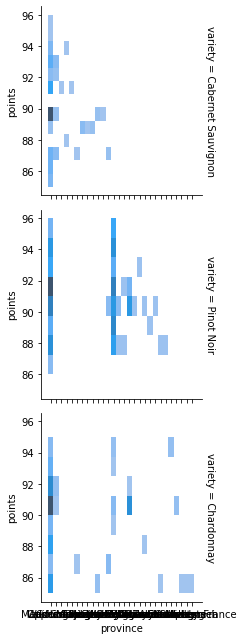

In [94]:
# What effect do each of “Cabernet Sauvignon”,“Pinot Noir”and“Chardonnay” have on price
variety = df[df['variety'].isin(['Cabernet Sauvignon','Pinot Noir','Chardonnay'])]

plt.figure()
fg=sns.FacetGrid(variety,row="variety",margin_titles=True)
fg.map(sns.histplot,"province","points")
fg.add_legend()
plt.show()
plt.close()


In [95]:
variety['points'].mean()
c = df[df['variety'].isin(['Cabernet Sauvignon'])].mean()
c
p = df[df['variety'].isin(['Pinot Noir'])].mean()
p
y = df[df['variety'].isin(['Chardonnay'])].mean()
y

C:\Users\xavim\AppData\Local\Temp/ipykernel_7264/3775266561.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  c = df[df['variety'].isin(['Cabernet Sauvignon'])].mean()
C:\Users\xavim\AppData\Local\Temp/ipykernel_7264/3775266561.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  p = df[df['variety'].isin(['Pinot Noir'])].mean()
C:\Users\xavim\AppData\Local\Temp/ipykernel_7264/3775266561.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  y = df[df['variety'].isin(['Chardonnay'])].mea

points    89.815534
dtype: float64

From the histograms the average points for each one of these varieties seems to be around 90 and all 3 seem to have roughly the same average points. This is supported by the code i ran in the above cell. The variety with the most in the highest bracket of points is piont noir which also has 2 different provinces in the top bracket of points. 

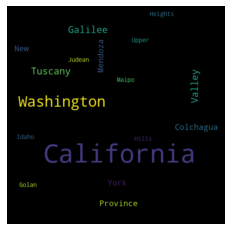

In [96]:
# wordcloud for cabernet sauvignon
from wordcloud import WordCloud

c = df[df['variety'].isin(['Cabernet Sauvignon'])]['province']
text = ','.join(c)
wordcloud = WordCloud(width =500, height =500, margin=10).generate(text)
plt.imshow(wordcloud, interpolation ="bilinear")
plt.axis("off")
plt.margins(x =0, y =0)
plt.show()


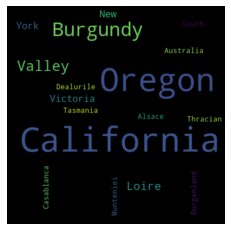

In [97]:
# wordcloud for Pinot Noir
p = df[df['variety'].isin(['Pinot Noir'])]['province']
text = ' '.join(p)
wordcloud = WordCloud(width =500, height =500, margin=10).generate(text)
plt.imshow(wordcloud, interpolation ="bilinear")
plt.axis("off")
plt.margins(x =0, y =0)
plt.show()

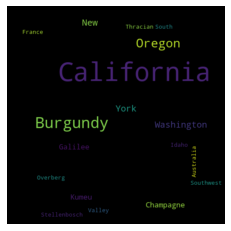

In [98]:
# wordcloud for Chardonnay
y = df[df['variety'].isin(['Chardonnay'])]['province']
text = ' '.join(y)
wordcloud = WordCloud(width =500, height =500, margin=10).generate(text)
plt.imshow(wordcloud, interpolation ="bilinear")
plt.axis("off")
plt.margins(x =0, y =0)
plt.show()